# Stock Market Analysis

This Jupyter Notebook provides tools for analyzing stock market data using Python. 
We utilize various libraries such as `pandas`, `numpy`, and `yfinance` to fetch, process, and analyze stock price trends and returns.

## Key Features of this Notebook:

1. **Download stock data**:  
   Fetch historical data using Yahoo Finance.

2. **Load CSV file to data frame**:  
    The function `convert_to_df` reads the stock data from a CSV file and loads it into a Pandas DataFrame.
     - This ensures data persistence between sessions.

3. **Daily Return Calculation**:  
   Compute the daily percentage returns for the stock.

4. **Return Analysis over Time**:  
   Evaluate cumulative returns for a specific period.

5. **Visualization**:  
   Generate candlestick charts and other plots to visualize stock trends.

6. **Stock Price Visualization**:  
   The `price_plot` function visualizes a stock's adjusted closing price over a specified date range. It reads data from a CSV file, filters by the given dates, and plots the adjusted closing prices against time. The plot uses a **red line** and includes grid lines with a light purple background for clarity, making it useful for analyzing stock price trends.   

7. **Download multiple stocks**:  
   Fetch historical data of multiple stocks using Yahoo Finance.

8. **Merging Stock Data**:  
   Consolidate data from multiple stocks into a single DataFrame, filtered by specific column names (e.g., 'Adj Close') for further analysis.  

9. **Stock Performance Visualization**:  
   Use the `plot_return_mult_stocks` function to visualize the growth of an initial investment across multiple stocks over time, based on their adjusted closing prices.  

10. **Stock Performance Metrics for Single Stock**:  
    Calculate the **mean** and **standard deviation** for a specific stock's adjusted closing price using the `get_stock_mean_sd` function.  
    Additionally, the **coefficient of variation** is calculated as the ratio of standard deviation to mean, which helps in assessing the risk relative to the expected return.  

11. **Stock Performance Metrics for Multiple Stocks**:  
    Calculate and display the **mean**, **standard deviation**, and **coefficient of variation** for each stock in a dataset using the `get_mult_stock_mean_sd` function.  
    This function iterates over all stocks and provides statistical insights for multiple stock comparisons.

12. **Comprehensive Stock Data Analysis**:  
    This section tests all the functions created in the notebook, demonstrating how they can be used together for a complete stock analysis.  
    - It begins by downloading data for a specific stock (e.g., AAPL) from Yahoo Finance, converting the data into a DataFrame, and adding daily returns using the `add_daily_return` function.  
    - Next, the **total return** is calculated between specified start and end dates using the `returns_over_a_time` function.  
    - Various visualizations are produced using `mplfinance_plot` for OHLC (Open, High, Low, Close) charts and `price_plot` for stock price trends.  
    - The section also demonstrates downloading and comparing multiple stocks (e.g., META, TSLA, AMD, AMZN) using the `merge_df_by_column_name` function.  
    - The `plot_return_mult_stocks` function is used to visualize the cumulative returns of these stocks based on an initial investment.  
    - Finally, the **mean**, **standard deviation**, and **coefficient of variation** of the adjusted close values of these stocks are calculated and displayed using the `get_mult_stock_mean_sd` function, providing insights into the risk and return profile of each stock.





## Import Libraries
We start by importing the necessary Python libraries. These include:
- `pandas` and `numpy` for data manipulation.
- `yfinance` for downloading stock data.
- `matplotlib` for visualization.
- `mplfinance` for candlestick charting.

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf



1. ## Download Stock Data
The function `down_from_yah` fetches historical stock data for a given stock symbol within a specified date range.
- It uses the Yahoo Finance API.
- The data is cleaned and saved as a CSV file for further analysis.

In [111]:
def down_from_yah(stock, syear, smonth, sdate, eyear, emonth, edate):
    # Set the start and end date for the download
    start = dt.datetime(syear, smonth, sdate)
    end = dt.datetime(eyear, emonth, edate)
    
    # Download the stock data
    df = yf.download(stock, start=start, end=end)
    
    # Reset index to move the 'Date' from index to a column
    df = df.reset_index()
    
    # Rename columns to match your desired names
    df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    
    # Remove the time part from the 'Date' column
    df['Date'] = df['Date'].dt.date
    
    # Save the cleaned dataframe to CSV
    df.to_csv('/Users/raghul/Desktop/stocks/' + stock + '.csv', index=False)  # Save without index
    
    # Display the cleaned dataframe
    print("Cleaned DataFrame:")
    print(df.head())
    
    return df

    






2.  ## Load Stock Data from CSV
The function `convert_to_df` reads the stock data from a CSV file and loads it into a Pandas DataFrame.
- This ensures data persistence between sessions.

In [112]:
def convert_to_df(stock):
    # Attempt to read the CSV file for the given stock
    try:
        # Define the path to the CSV file
        df = pd.read_csv('/Users/raghul/Desktop/stocks/'+ stock + '.csv')
    
    # Handle the case where the file is not found
    except FileNotFoundError:
        print('File not found')
    
    # If the file is found, return the DataFrame
    else:
        return df


3. ## Daily Return Calculation**  
   Compute the daily percentage returns for the stock.

   Calculate Daily Return: The function creates a new column called 'Daily return', which is calculated as the ratio of the current day's adjusted close price ('Adj Close') to the previous day's adjusted close price. The formula used is:

Daily return=(Adj Close/Adj Close from previous day)−1

This gives the percentage change in the adjusted close price from the previous day.

In [113]:
def add_daily_return(df, stock):
    # Calculate the daily return by taking the ratio of today's 'Adj Close' to yesterday's 'Adj Close' minus 1
    df['Daily return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    
    # Save the updated DataFrame with the daily return to a new CSV file
    df.to_csv('/Users/raghul/Desktop/stocks/' + stock + '.csv')
    
    # Return the updated DataFrame
    return df
    

4. ## Return Analysis over Time** 
   Evaluate cumulative returns for a specific period.

In [120]:
def returns_over_a_time(df, syear, smonth, sdate, eyear, emonth, edate):
    # Format the start and end dates for comparison
    start = f"{syear}-{smonth}-{sdate}"
    end = f"{eyear}-{emonth}-{edate}"
    
    # Convert 'Date' column to datetime format for comparison
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create a mask to filter the rows between the specified start and end dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Calculate the mean of daily returns within the specified date range
    daily_return = df.loc[mask]['Daily return'].mean()
    
    # Create a new DataFrame filtered by the date range
    df2 = df.loc[mask]
    
    # Get the number of days in the filtered DataFrame
    days = df2.shape[0]
    
    # Calculate and return the total return over the time period (days * daily return)
    return (days * daily_return)

5. ## Visualization**  
   Generate candlestick charts and other plots to visualize stock trends.

In [123]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, edate):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{edate}"
    
    try:
        
        df = pd.read_csv('/Users/raghul/Desktop/stocks/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')
        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

6. ## Stock Price Visualization**  
   The `price_plot` function visualizes a stock's adjusted closing price over a specified date range. It reads data from a CSV file, filters by the given dates, and plots the adjusted closing prices against time. The plot uses a **red line** and includes grid lines with a light purple background for clarity, making it useful for analyzing stock price trends. 

In [125]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        
        df = pd.read_csv("/Users/raghul/Desktop/stocks/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='red')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#E6E6FA')

7. ## Download multiple stocks** 
   Fetch historical data of multiple stocks using Yahoo Finance.

In [133]:
def download_multiple_stocks(syear, smonth, sdate, eyear, emonth, edate, *args):
    # Iterate over each stock ticker symbol passed as argument
    for x in args:
        # Call down_from_yah for each stock ticker and pass the given start and end dates
        down_from_yah(x, syear, smonth, sdate, eyear, emonth, edate)

8. ## Merging Stock Data**  
   Consolidate data from multiple stocks into a single DataFrame, filtered by specific column names (e.g., 'Adj Close') for further analysis. 

In [134]:
def merge_df_by_column_name(col_name, syear, smonth, sdate, eyear, emonth, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    # Convert start and end date to a string format
    start = f"{syear}-{smonth}-{sdate}"
    end = f"{eyear}-{emonth}-{edate}"
    
    # Loop through all the tickers provided as arguments
    for x in tickers:
        # Download data from Yahoo Finance for each ticker
        df = yf.download(x, start=start, end=end)  # Download data using yfinance
        # Store the specified column (e.g., 'Adj Close') in the new dataframe
        mult_df[x] = df[col_name]
        
    return mult_df

9. ## Stock Performance Visualization**
   Use the `plot_return_mult_stocks` function to visualize the growth of an initial investment across multiple stocks over time, based on their adjusted closing prices.  

In [1]:
def plot_return_mult_stocks(investment, stock_df):
    # Normalize the stock prices based on the initial price and multiply by the investment amount
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

10. ## Stock Performance Metrics for Single Stock**  
    Calculate the **mean** and **standard deviation** for a specific stock's adjusted closing price using the `get_stock_mean_sd` function.  
    Additionally, the **coefficient of variation** is calculated as the ratio of standard deviation to mean, which helps in assessing the risk relative to the expected return. 

In [130]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

11. ## Stock Performance Metrics for Multiple Stocks**  
    Calculate and display the **mean**, **standard deviation**, and **coefficient of variation** for each stock in a dataset using the `get_mult_stock_mean_sd` function.  
    This function iterates over all stocks and provides statistical insights for multiple stock comparisons.

In [131]:
def get_mult_stock_mean_sd(stock_df):
    # Iterate over each stock (column) in the DataFrame
    for stock in stock_df:
        
        # Calculate mean and standard deviation for the current stock
        mean, sd = get_stock_mean_sd(stock_df, stock)
        
        # Calculate the coefficient of variation (ratio of standard deviation to mean)
        cov = sd / mean
        
        # Print the results for the current stock with formatted values
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        
        # Print the coefficient of variation
        print("Coefficient of Variation: {}\n".format(cov))

12. ## Comprehensive Stock Data Analysis**  
    This section tests all the functions created in the notebook, demonstrating how they can be used together for a complete stock analysis.  
    - It begins by downloading data for a specific stock (e.g., AAPL) from Yahoo Finance, converting the data into a DataFrame, and adding daily returns using the `add_daily_return` function.  
    - Next, the **total return** is calculated between specified start and end dates using the `returns_over_a_time` function.  
    - Various visualizations are produced using `mplfinance_plot` for OHLC (Open, High, Low, Close) charts and `price_plot` for stock price trends.  
    - The section also demonstrates downloading and comparing multiple stocks (e.g., META, TSLA, AMD, AMZN) using the `merge_df_by_column_name` function.  
    - The `plot_return_mult_stocks` function is used to visualize the cumulative returns of these stocks based on an initial investment.  
    - Finally, the **mean**, **standard deviation**, and **coefficient of variation** of the adjusted close values of these stocks are calculated and displayed using the `get_mult_stock_mean_sd` function, providing insights into the risk and return profile of each stock.

[*********************100%***********************]  1 of 1 completed

Cleaned DataFrame:
         Date   Adj Close       Close        High         Low        Open  \
0  2022-01-03  179.076584  182.009995  182.880005  177.710007  177.830002   
1  2022-01-04  176.803818  179.699997  182.940002  179.119995  182.630005   
2  2022-01-05  172.100830  174.919998  180.169998  174.639999  179.610001   
3  2022-01-06  169.227921  172.000000  175.300003  171.639999  172.699997   
4  2022-01-07  169.395157  172.169998  174.139999  171.029999  172.889999   

      Volume  
0  104487900  
1   99310400  
2   94537600  
3   96904000  
4   86709100  
Total Return : 0.15998251476939496



/var/folders/63/f458bmd11lxb90nqcxgfv6qw0000gn/T/ipykernel_27062/3017699232.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/raghul/Desktop/stocks/' + ticker + '.csv',index_col=0,parse_dates=True)


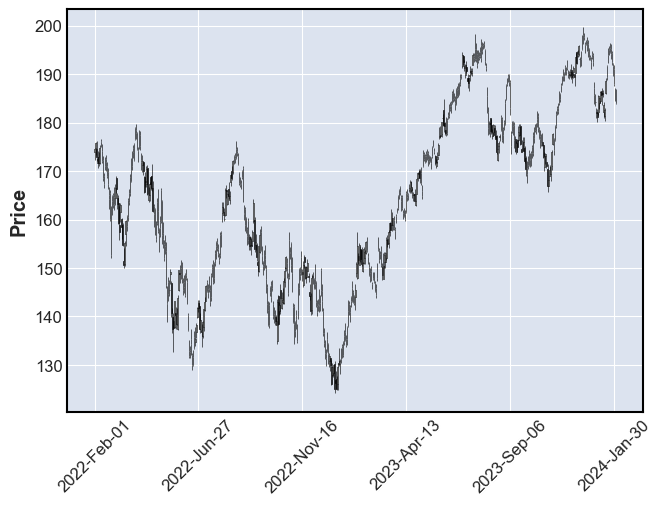

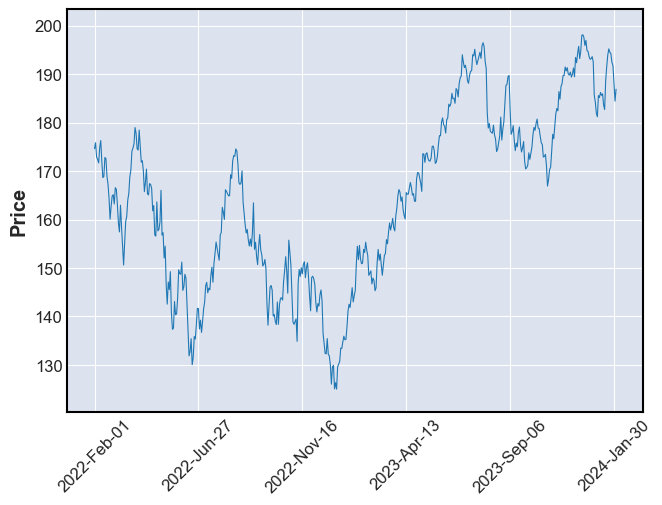

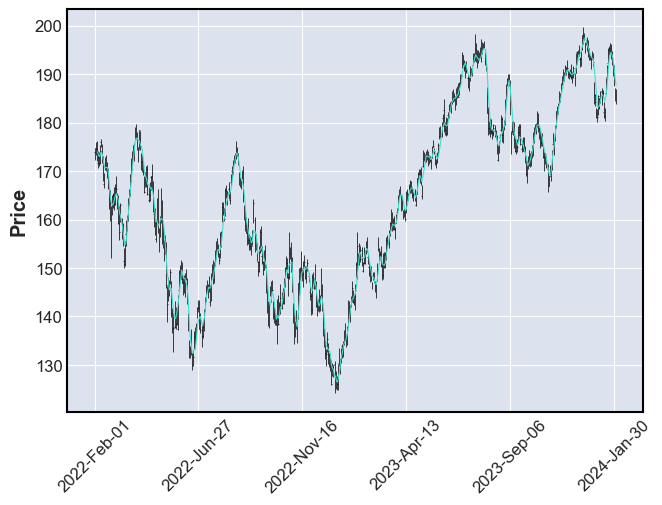

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock: META Mean:  222.53 Standard deviation: 76.10
Coefficient of Variation: 0.34195770358271416

Stock: AAPL Mean:  162.84 Standard deviation: 18.44
Coefficient of Variation: 0.11326708234502174

Stock: TSLA Mean:  235.48 Standard deviation: 51.67
Coefficient of Variation: 0.21943835728292438

Stock: AMD  Mean:   98.34 Standard deviation: 23.33
Coefficient of Variation: 0.23718988609956637

Stock: AMZN Mean:  123.73 Standard deviation: 21.49
Coefficient of Variation: 0.17372896542017277



,META,AAPL,TSLA,AMD,AMZN
Date,,,,,
2022-02-01 00:00:00+00:00,318.042419,171.795837,310.416656,116.779999,151.193497
2022-02-02 00:00:00+00:00,322.030426,173.006012,301.886658,122.760002,150.612503
2022-02-03 00:00:00+00:00,237.046280,170.113388,297.046661,120.080002,138.845505
2022-02-04 00:00:00+00:00,236.378296,169.827728,307.773346,123.599998,157.639496
2022-02-07 00:00:00+00:00,224.234863,169.108597,302.446655,123.669998,157.935501
...,...,...,...,...,...
2024-01-25 00:00:00+00:00,391.999725,193.223404,182.630005,180.330002,157.750000
2024-01-26 00:00:00+00:00,392.956879,191.481934,183.250000,177.250000,159.119995
2024-01-29 00:00:00+00:00,399.816162,190.795288,190.929993,177.830002,161.259995


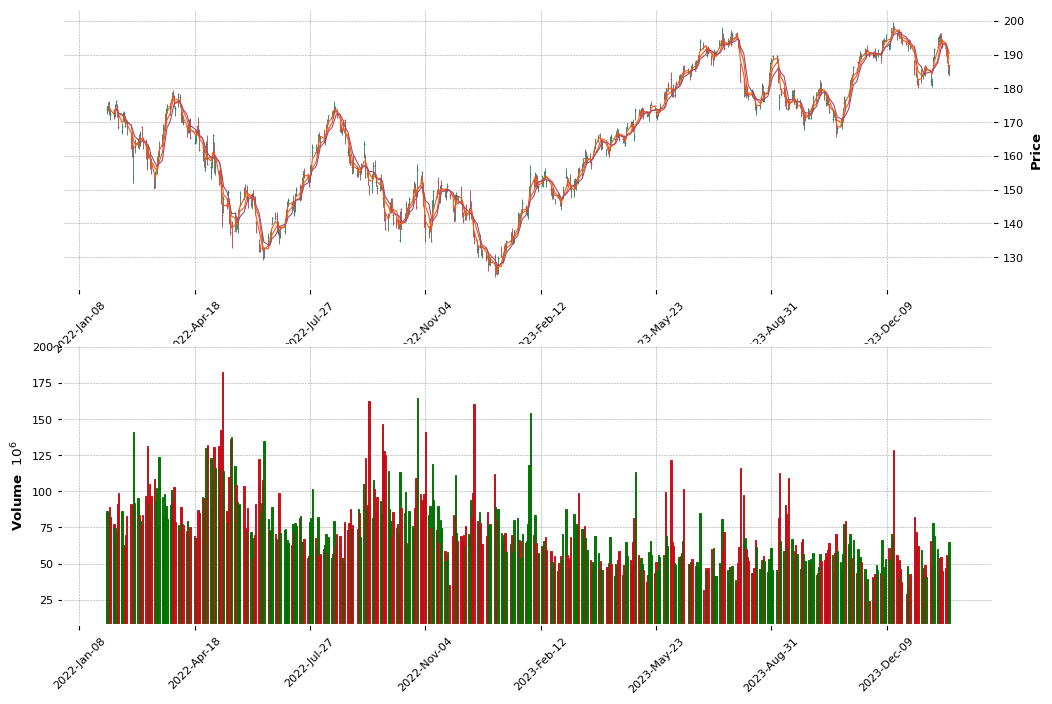

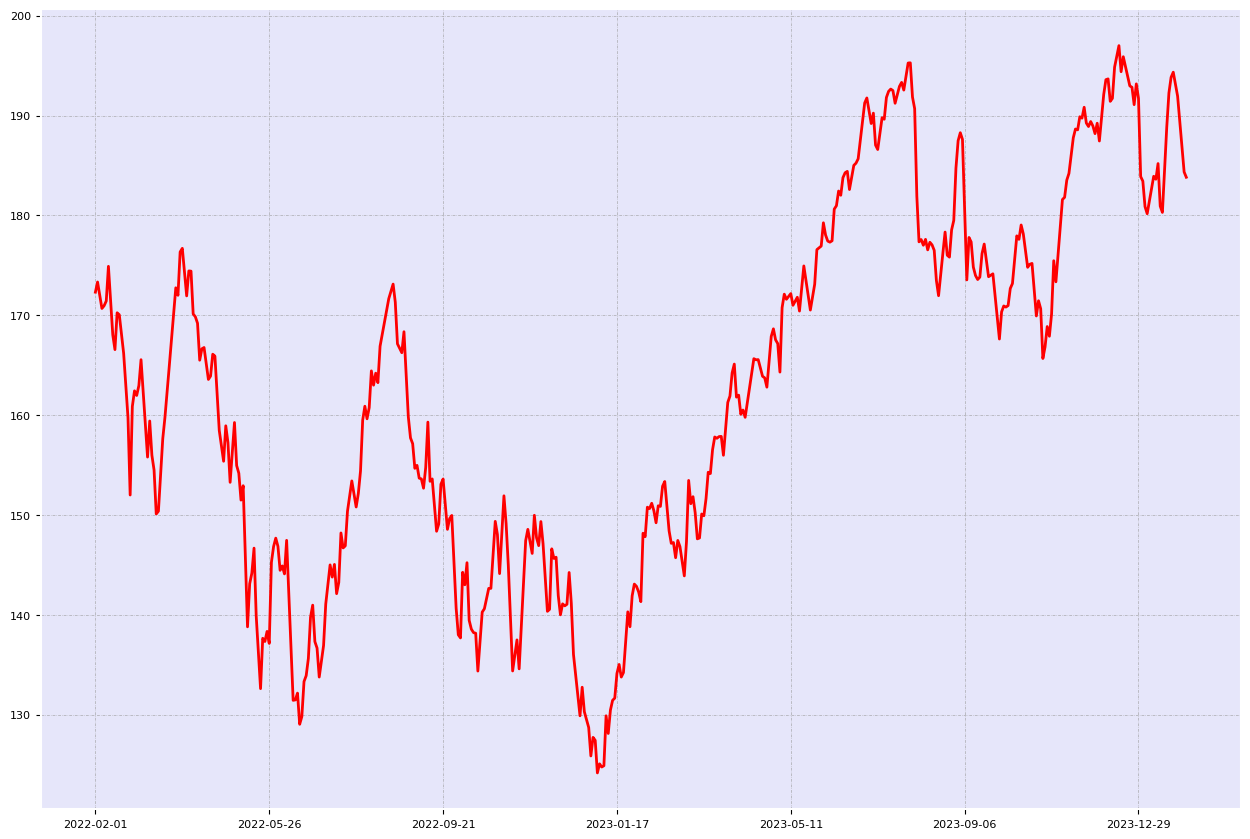

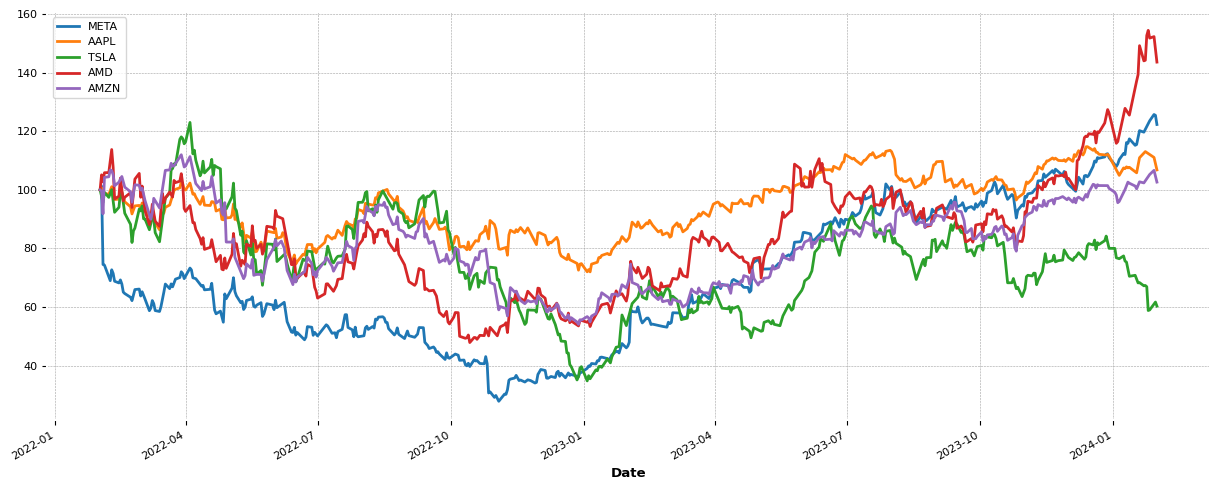

In [143]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AAPL = down_from_yah('AAPL', 2022, 1, 1, 2024, 12, 1)

# Retrieve data from the CSV file
AAPL = convert_to_df('AAPL')

# Add daily return to function
add_daily_return(AAPL, 'AAPL')

# Get total return between dates
tot_ret = returns_over_a_time(AAPL, 2022, 2, 1, 2024, 2, 1)
print("Total Return :", tot_ret)

# Use Matplotlib finance to print multiple charts
mplfinance_plot('AAPL', 'ohlc', 2022, 2, 1, 2024, 2, 1)

price_plot('AAPL', 2022, 2, 1, 2024, 2, 1)

# Download multiple stocks
stocks = ["META", "TSLA", "AMD",'AMZN']
#download_multiple_stocks(2022, 2, 1, 2024, 12, 1, *stocks)
stocks = ["META","AAPL", "TSLA", "AMD",'AMZN']
mult_df = merge_df_by_column_name('Adj Close',  2022, 2, 1, 2024, 2 , 1, *stocks)
plot_return_mult_stocks(100, mult_df)

# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df
